<a href="https://colab.research.google.com/github/kkc0122/Machine-Learning/blob/main/2_%EC%9E%AC%EB%AC%B4_%EB%B9%84%EC%9C%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 파일 경로 설정
file_path = '/content/sample_data/SBS미디어홀딩스_2019.xlsx'

# 엑셀 파일 읽기
excel_data = pd.ExcelFile(file_path)

# 엑셀 파일에 있는 모든 시트 이름 확인
excel_data.sheet_names

['Data_bs', 'Data_cis', 'Data_cf']

In [ ]:
# 'Data_bs' 시트 데이터 읽기
data_bs = pd.read_excel(file_path, sheet_name='Data_bs')

# 데이터 미리보기
data_bs.head()

,Unnamed: 0,Unnamed: 1,20201231,20191231,20181231,20171231,20161231
0,class2,class3,"('연결재무제표',)","('연결재무제표',)","('연결재무제표',)","('연결재무제표',)","('연결재무제표',)"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,유동자산,NaN,347709874597,224557769746,355738860689,358833861939,395621490948
3,유동자산,현금및현금성자산,51512895742,61882731699,115828138078,87194599757,115911705150
4,유동자산,매출채권 및 기타유동채권,35185558173,54385833879,87297317233,99380560554,111840309240


In [ ]:
# 필요한 데이터 추출 및 정리
data_bs_cleaned = data_bs.dropna(how='all')  # 모든 값이 NaN인 행 제거
data_bs_cleaned.columns = ['항목', '세부항목', '2020년', '2019년', '2018년', '2017년', '2016년']

# 숫자 데이터로 변환
for col in ['2020년', '2019년', '2018년', '2017년', '2016년']:
    data_bs_cleaned[col] = pd.to_numeric(data_bs_cleaned[col], errors='coerce')

# 주요 데이터 계산
유동자산 = data_bs_cleaned.loc[data_bs_cleaned['항목'] == '유동자산', '2020년'].sum()
유동부채 = data_bs_cleaned.loc[data_bs_cleaned['항목'] == '유동부채', '2020년'].sum()
비유동부채 = data_bs_cleaned.loc[data_bs_cleaned['항목'] == '비유동부채', '2020년'].sum()
자본총계 = data_bs_cleaned.loc[data_bs_cleaned['항목'] == '자본총계', '2020년'].sum()
총부채 = 유동부채 + 비유동부채

# 비율 계산
유동비율 = (유동자산 / 유동부채) * 100 if 유동부채 != 0 else None
부채비율 = (총부채 / 자본총계) * 100 if 자본총계 != 0 else None

# 결과 출력
{
    '유동자산': 유동자산,
    '유동비율': 유동비율,
    '비유동부채': 비유동부채,
    '부채비율': 부채비율,
    '자본총계': 자본총계,
}

<ipython-input-3-c620612ee82a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bs_cleaned[col] = pd.to_numeric(data_bs_cleaned[col], errors='coerce')


{'유동자산': 695419749194.0,
 '유동비율': 198.40990427073498,
 '비유동부채': 36999684192.0,
 '부채비율': 74.15500491262628,
 '자본총계': 522548915074.0}

<ipython-input-4-fa83e94a9bf3>:23: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.tight_layout()
<ipython-input-4-fa83e94a9bf3>:23: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
<ipython-input-4-fa83e94a9bf3>:23: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-4-fa83e94a9bf3>:23: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  plt.tight_layout()
<ipython-input-4-fa83e94a9bf3>:23: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  plt.tight_layout()
<ipython-input-4-fa83e94a9bf3>:23: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
<ipython-input-4-fa83e94a9bf3>:23: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  plt.tight_layout()
<ipython-input-4-fa83e94a9bf3>:23: UserWarning: Glyph 4792

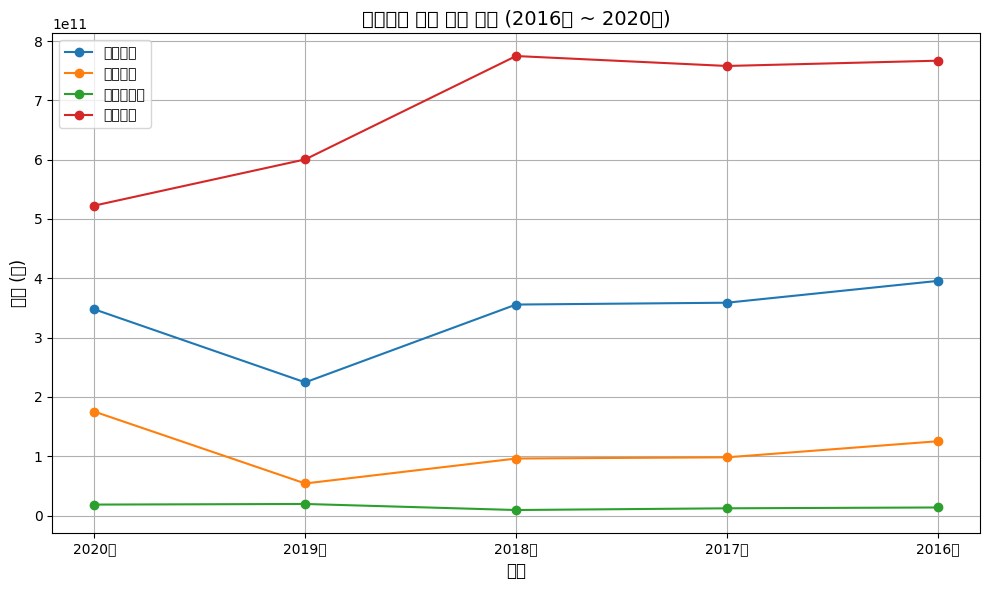

In [ ]:
import matplotlib.pyplot as plt

# 시각화를 위한 데이터 정리
years = ['2020년', '2019년', '2018년', '2017년', '2016년']
유동자산_data = data_bs_cleaned.loc[data_bs_cleaned['항목'] == '유동자산', years].iloc[0].values
유동부채_data = data_bs_cleaned.loc[data_bs_cleaned['항목'] == '유동부채', years].iloc[0].values
비유동부채_data = data_bs_cleaned.loc[data_bs_cleaned['항목'] == '비유동부채', years].iloc[0].values
자본총계_data = data_bs_cleaned.loc[data_bs_cleaned['항목'] == '자본총계', years].iloc[0].values

# 꺾은선 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(years, 유동자산_data, marker='o', label='유동자산')
plt.plot(years, 유동부채_data, marker='o', label='유동부채')
plt.plot(years, 비유동부채_data, marker='o', label='비유동부채')
plt.plot(years, 자본총계_data, marker='o', label='자본총계')

# 그래프 꾸미기
plt.title('재무상태 주요 항목 변화 (2016년 ~ 2020년)', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('금액 (원)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

In [ ]:
# 새로운 파일 경로 설정
file_path_new = '/content/sample_data/모다_2019.xlsx'

# 'Data_cis' 시트 데이터 읽기
data_cis_new = pd.read_excel(file_path_new, sheet_name='Data_cis')

# 데이터 구조 및 미리보기 확인
data_cis_new.info()
data_cis_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         24 non-null     object
 1   Unnamed: 1         12 non-null     object
 2   Unnamed: 2         5 non-null      object
 3   20190101-20191231  22 non-null     object
 4   20180101-20181231  23 non-null     object
 5   20170101-20171231  22 non-null     object
 6   20160101-20161231  22 non-null     object
 7   20150101-20151231  18 non-null     object
 8   20140101-20141231  18 non-null     object
dtypes: object(9)
memory usage: 1.9+ KB


,Unnamed: 0,Unnamed: 1,Unnamed: 2,20190101-20191231,20180101-20181231,20170101-20171231,20160101-20161231,20150101-20151231,20140101-20141231
0,class1,class2,class3,"('연결재무제표',)","('연결재무제표',)","('연결재무제표',)","('연결재무제표',)","('연결재무제표',)","('연결재무제표',)"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,영업수익(매출액),NaN,NaN,71413476122,109679144386,118523420377,93948190976,22215960045,19269928940
3,영업비용,NaN,NaN,74881166679,118407799018,122799787795,88676199211,25705421416,26214506931
4,영업이익(손실),NaN,NaN,-3467690577,-8728654632,-4276367418,5271991765,-3489461371,-6944577991


In [ ]:
# 열 이름 재정의
data_cis_new.columns = [
    '항목', '세부항목', '추가정보', '2019년', '2018년', '2017년', '2016년', '2015년', '2014년'
]

# 숫자 데이터 변환
for col in ['2019년', '2018년', '2017년', '2016년', '2015년', '2014년']:
    data_cis_new[col] = pd.to_numeric(data_cis_new[col], errors='coerce')

# 주요 데이터 추출
매출액_2019 = data_cis_new.loc[data_cis_new['항목'] == '영업수익(매출액)', '2019년'].sum()
매출액_2018 = data_cis_new.loc[data_cis_new['항목'] == '영업수익(매출액)', '2018년'].sum()
매출총이익 = data_cis_new.loc[data_cis_new['항목'] == '매출총이익', '2019년'].sum()
영업이익 = data_cis_new.loc[data_cis_new['항목'] == '영업이익(손실)', '2019년'].sum()
순이익 = data_cis_new.loc[data_cis_new['항목'] == '당기순이익(손실)', '2019년'].sum()

# 성장률 및 비율 계산
매출성장률 = ((매출액_2019 - 매출액_2018) / 매출액_2018) * 100 if 매출액_2018 != 0 else None
매출총이익률 = (매출총이익 / 매출액_2019) * 100 if 매출액_2019 != 0 else None
영업이익률 = (영업이익 / 매출액_2019) * 100 if 매출액_2019 != 0 else None
순이익률 = (순이익 / 매출액_2019) * 100 if 매출액_2019 != 0 else None

# 결과 출력
{
    '매출 성장률': 매출성장률,
    '매출총이익률': 매출총이익률,
    '영업이익률': 영업이익률,
    '순이익률': 순이익률,
}

{'매출 성장률': -34.88873703220138,
 '매출총이익률': 0.0,
 '영업이익률': -4.855793003376467,
 '순이익률': -28.279236213763536}

<ipython-input-9-a81131cad98d>:16: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:16: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:16: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:16: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:16: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:16: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:16: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:16: UserWarning: Glyph 50896 

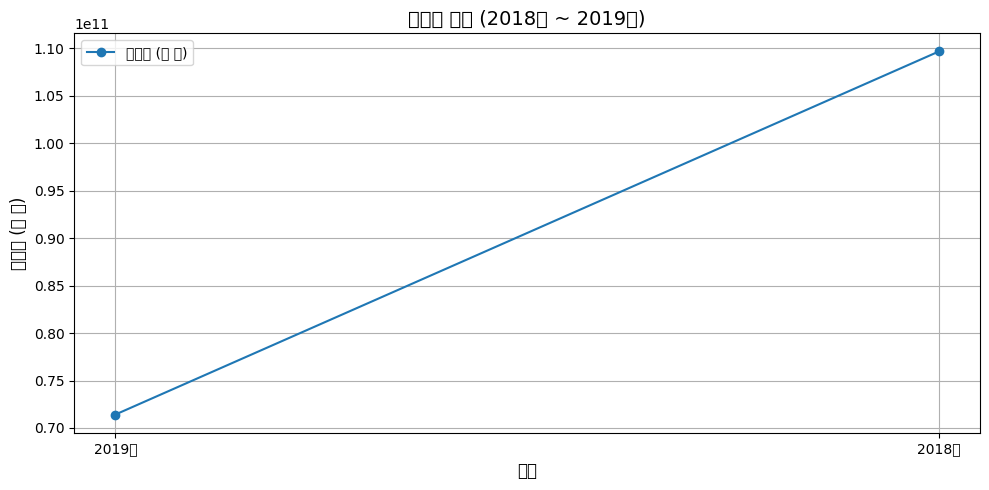

<ipython-input-9-a81131cad98d>:26: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:26: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:26: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:26: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:26: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:26: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  plt.tight_layout()
<ipython-input-9-a81131cad98d>:26: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabto

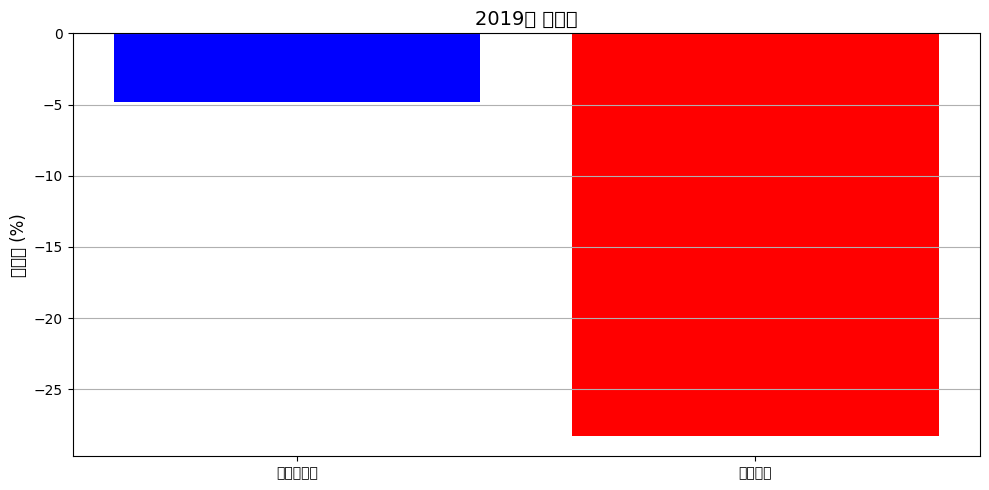

In [ ]:
import matplotlib.pyplot as plt

# 데이터 정리
years = ['2019년', '2018년']
매출액_data = [매출액_2019, 매출액_2018]
이익률_data = [영업이익률, 순이익률]

# 매출액 변화 시각화
plt.figure(figsize=(10, 5))
plt.plot(years, 매출액_data, marker='o', label='매출액 (억 원)')
plt.title('매출액 변화 (2018년 ~ 2019년)', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('매출액 (억 원)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 이익률 변화 시각화
이익률_항목 = ['영업이익률', '순이익률']
plt.figure(figsize=(10, 5))
plt.bar(이익률_항목, 이익률_data, color=['blue', 'red'])
plt.title('2019년 이익률', fontsize=14)
plt.ylabel('이익률 (%)', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# 새로 업로드된 파일 경로 설정
file_path_updated = '/content/sample_data/모다_2019.xlsx'

# 'Data_cf' 시트 데이터 읽기
data_cf = pd.read_excel(file_path_updated, sheet_name='Data_cf')

# 데이터 구조 및 미리보기 확인
data_cf.info()
data_cf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         55 non-null     object
 1   Unnamed: 1         47 non-null     object
 2   20190101-20191231  55 non-null     object
 3   20180101-20181231  55 non-null     object
 4   20170101-20171231  46 non-null     object
 5   20160101-20161231  36 non-null     object
 6   20150101-20151231  30 non-null     object
 7   20140101-20141231  29 non-null     object
dtypes: object(8)
memory usage: 3.6+ KB


,Unnamed: 0,Unnamed: 1,20190101-20191231,20180101-20181231,20170101-20171231,20160101-20161231,20150101-20151231,20140101-20141231
0,class1,class2,"('연결재무제표',)","('연결재무제표',)","('연결재무제표',)","('연결재무제표',)","('연결재무제표',)","('연결재무제표',)"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,영업활동현금흐름,NaN,22366095369,-29404223986,-5896934087,13407141521,-5904264364,-3201355321
3,영업활동현금흐름,당기순이익(손실),-20195185601,-5819453684,-43384652848,3150768999,-3145875910,-6414020850
4,영업활동현금흐름,당기순이익조정을 위한 가감,33923424398,1214254410,54131342283,8633604513,2904213380,2023679914


In [ ]:
# 'Data_bs' 시트 데이터 읽기
data_bs_updated = pd.read_excel(file_path_updated, sheet_name='Data_bs')

# 열 이름 재정의 및 데이터 정리
data_bs_updated.columns = ['항목', '세부항목', '추가정보', '2020년', '2019년', '2018년', '2017년', '2016년']
for col in ['2020년', '2019년', '2018년', '2017년', '2016년']:
    data_bs_updated[col] = pd.to_numeric(data_bs_updated[col], errors='coerce')

# 2019년 총부채 계산
유동부채_2019 = data_bs_updated.loc[data_bs_updated['항목'] == '유동부채', '2019년'].sum()
비유동부채_2019 = data_bs_updated.loc[data_bs_updated['항목'] == '비유동부채', '2019년'].sum()
총부채_2019 = 유동부채_2019 + 비유동부채_2019

# 2019년 영업활동현금흐름 가져오기
영업활동현금흐름_2019 = data_cf.loc[data_cf['Unnamed: 0'] == '영업활동현금흐름', '20190101-20191231'].astype(float).sum()

# 현금흐름대비 부채비율 계산
현금흐름대비_부채비율 = (총부채_2019 / 영업활동현금흐름_2019) * 100 if 영업활동현금흐름_2019 != 0 else None

# 결과 출력
{
    '총부채_2019': 총부채_2019,
    '영업활동현금흐름_2019': 영업활동현금흐름_2019,
    '현금흐름대비 부채비율': 현금흐름대비_부채비율
}

{'총부채_2019': 559296702286.0,
 '영업활동현금흐름_2019': 44732190738.0,
 '현금흐름대비 부채비율': 1250.322626856899}